In [1]:
import tensorflow as tf

In [2]:
learning_rate = 0.0005
training_epoch = 10000

In [3]:
dl_lr = tf.keras.Sequential()

## 딥러닝 모델의 layer 설정

- 입력 변수의 구조 알려주기 : tf.keras.Input(shape=()) >> csv파일을 예로 들면 '열'의 개수를 알려주면 됨.
    - 입력변수가 x1, x2 2개이므로 shape=(2,)로 설정한다

- layer 설정 : tf.keras.layers.Dense(노드의 개수, activation= 활성화 함수 지정)

In [4]:
dl_lr.add(tf.keras.Input(shape=(2,))) # 입력변수 구조 설정 input할 때, 대문자 I 임
dl_lr.add(tf.keras.layers.Dense(16,activation='relu'))
dl_lr.add(tf.keras.layers.Dense(32,activation='relu'))
dl_lr.add(tf.keras.layers.Dense(1)) # 마지막엔 종속 변수 y값이 그대로 나와야 
#                                 하기 때문에 activation 미 설정

## 모델의 optimizer와 loss(비용함수)를 설정

- optimizer : 비용함수를 이용해 비용을 최소화하는 방향으로 모델의 가중치를 업데이트하는 최적화 함수이다. 주로 Adam을 사용

- loss : 비용함수이다. 대표적으로 MeanSquaredError(최소제곱법)를 사용한다.

In [5]:
dl_lr.compile(optimizer=tf.keras.optimizers.Adam(),
             loss=tf.keras.losses.MeanSquaredError())

In [6]:
dl_lr.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                48        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 625
Trainable params: 625
Non-trainable params: 0
_________________________________________________________________


# 모델 학습시키기

### 데이터 불러오기

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [9]:
data = pd.read_csv("./data/quadratic_sample_tensorflow.csv",skiprows=1,header=None,names=['x1','x2','y'])

In [10]:
data

,x1,x2,y
0,0.1,0.01,94.818981
1,0.2,0.04,94.633440
2,0.3,0.09,98.196254
3,0.4,0.16,92.815593
4,0.5,0.25,86.194229
...,...,...,...
194,19.5,380.25,91.713508
195,19.6,384.16,87.253908
196,19.7,388.09,98.795449
197,19.8,392.04,93.435914


### 학습데이터, 테스트데이터 분리

In [11]:
X = data[['x1','x2']]
# X = data[['x1']]
Y = data['y']
xTrain,xTest,yTrain,yTest = train_test_split(X,Y,test_size=0.2)

In [13]:
xTrain

,x1,x2
171,17.2,295.84
81,8.2,67.24
12,1.3,1.69
161,16.2,262.44
69,7.0,49.00
...,...,...
141,14.2,201.64
120,12.1,146.41
76,7.7,59.29
186,18.7,349.69


### fit()함수로 모델을 학습시킨다.

- callbacks : 학습 도중에 호출할 함수를 설정한다. 
    - EarlyStopping() : validation_loss(검증손실)이 더이상 개선되지 않으면 학습을 중단시키는 함수이다. 즉 학습이 더 이상 의미 없어지면 epochs에 도달하기 전에 중지시킨다.
        - monitor : 모니터링할 값을 지정한다. > validation_loss를 줄여서 val_loss
        - patience : 지연 횟수를 의미. > 500 : 일단 학습을 500번 진행한 후부터 EarlyStopping()을 호출한다

- validation_split : 검증용 데이터셋을 0~1 사이의 값으로 설정한다. 

In [14]:
%%time
dl_lr.fit(x=xTrain,y=yTrain,epochs=training_epoch,
         callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=500),
         validation_split=0.2)

Epoch 1/10000
4/4 [==============================] - 1s 63ms/step - loss: 2223.2861 - val_loss: 3384.8960
Epoch 2/10000
4/4 [==============================] - 0s 9ms/step - loss: 1735.5100 - val_loss: 2752.8269
Epoch 3/10000
4/4 [==============================] - 0s 10ms/step - loss: 1357.9052 - val_loss: 2293.1792
Epoch 4/10000
4/4 [==============================] - 0s 12ms/step - loss: 1112.7289 - val_loss: 1983.9565
Epoch 5/10000
4/4 [==============================] - 0s 13ms/step - loss: 970.9663 - val_loss: 1801.5533
Epoch 6/10000
4/4 [==============================] - 0s 9ms/step - loss: 918.2005 - val_loss: 1710.1035
Epoch 7/10000
4/4 [==============================] - 0s 11ms/step - loss: 893.7842 - val_loss: 1677.1565
Epoch 8/10000
4/4 [==============================] - 0s 11ms/step - loss: 907.3524 - val_loss: 1666.2368
Epoch 9/10000
4/4 [==============================] - 0s 10ms/step - loss: 914.0883 - val_loss: 1662.8459
Epoch 10/10000
4/4 [==============================] -

4/4 [==============================] - 0s 9ms/step - loss: 768.8467 - val_loss: 1478.5596
Epoch 79/10000
4/4 [==============================] - 0s 11ms/step - loss: 765.2775 - val_loss: 1472.3682
Epoch 80/10000
4/4 [==============================] - 0s 13ms/step - loss: 760.1231 - val_loss: 1467.1418
Epoch 81/10000
4/4 [==============================] - 0s 11ms/step - loss: 756.2256 - val_loss: 1461.7700
Epoch 82/10000
4/4 [==============================] - 0s 9ms/step - loss: 752.5283 - val_loss: 1457.3384
Epoch 83/10000
4/4 [==============================] - 0s 10ms/step - loss: 748.1036 - val_loss: 1451.3867
Epoch 84/10000
4/4 [==============================] - 0s 12ms/step - loss: 742.6622 - val_loss: 1434.4933
Epoch 85/10000
4/4 [==============================] - 0s 9ms/step - loss: 737.1711 - val_loss: 1420.5208
Epoch 86/10000
4/4 [==============================] - 0s 9ms/step - loss: 731.9528 - val_loss: 1406.8970
Epoch 87/10000
4/4 [==============================] - 0s 12ms/ste

4/4 [==============================] - 0s 8ms/step - loss: 362.9449 - val_loss: 696.8447
Epoch 156/10000
4/4 [==============================] - 0s 10ms/step - loss: 359.3807 - val_loss: 680.5413
Epoch 157/10000
4/4 [==============================] - 0s 9ms/step - loss: 353.3477 - val_loss: 663.6298
Epoch 158/10000
4/4 [==============================] - 0s 12ms/step - loss: 348.3865 - val_loss: 658.7858
Epoch 159/10000
4/4 [==============================] - 0s 9ms/step - loss: 344.8260 - val_loss: 662.5504
Epoch 160/10000
4/4 [==============================] - 0s 9ms/step - loss: 340.0206 - val_loss: 647.2928
Epoch 161/10000
4/4 [==============================] - 0s 11ms/step - loss: 335.7900 - val_loss: 632.8788
Epoch 162/10000
4/4 [==============================] - 0s 9ms/step - loss: 335.2145 - val_loss: 634.5515
Epoch 163/10000
4/4 [==============================] - 0s 13ms/step - loss: 328.1929 - val_loss: 611.9042
Epoch 164/10000
4/4 [==============================] - 0s 10ms/step

Epoch 233/10000
4/4 [==============================] - 0s 8ms/step - loss: 128.7259 - val_loss: 221.8406
Epoch 234/10000
4/4 [==============================] - 0s 9ms/step - loss: 127.0567 - val_loss: 215.6943
Epoch 235/10000
4/4 [==============================] - 0s 9ms/step - loss: 125.6117 - val_loss: 215.5197
Epoch 236/10000
4/4 [==============================] - 0s 11ms/step - loss: 123.5129 - val_loss: 211.1970
Epoch 237/10000
4/4 [==============================] - 0s 9ms/step - loss: 121.8242 - val_loss: 206.0599
Epoch 238/10000
4/4 [==============================] - 0s 9ms/step - loss: 120.8812 - val_loss: 203.5890
Epoch 239/10000
4/4 [==============================] - 0s 8ms/step - loss: 119.8999 - val_loss: 206.4007
Epoch 240/10000
4/4 [==============================] - 0s 9ms/step - loss: 117.2809 - val_loss: 197.0360
Epoch 241/10000
4/4 [==============================] - 0s 12ms/step - loss: 118.5566 - val_loss: 193.6553
Epoch 242/10000
4/4 [==============================] 

4/4 [==============================] - 0s 9ms/step - loss: 47.3474 - val_loss: 73.7541
Epoch 312/10000
4/4 [==============================] - 0s 9ms/step - loss: 46.8813 - val_loss: 73.4227
Epoch 313/10000
4/4 [==============================] - 0s 9ms/step - loss: 46.1027 - val_loss: 73.0564
Epoch 314/10000
4/4 [==============================] - 0s 9ms/step - loss: 45.6116 - val_loss: 71.5220
Epoch 315/10000
4/4 [==============================] - 0s 12ms/step - loss: 45.2768 - val_loss: 71.4977
Epoch 316/10000
4/4 [==============================] - 0s 7ms/step - loss: 44.7361 - val_loss: 69.8915
Epoch 317/10000
4/4 [==============================] - 0s 7ms/step - loss: 44.1932 - val_loss: 69.8497
Epoch 318/10000
4/4 [==============================] - 0s 13ms/step - loss: 43.6918 - val_loss: 68.4349
Epoch 319/10000
4/4 [==============================] - 0s 9ms/step - loss: 43.9854 - val_loss: 67.7984
Epoch 320/10000
4/4 [==============================] - 0s 9ms/step - loss: 43.1803 - va

4/4 [==============================] - 0s 7ms/step - loss: 23.2135 - val_loss: 37.1411
Epoch 391/10000
4/4 [==============================] - 0s 7ms/step - loss: 22.9571 - val_loss: 37.8480
Epoch 392/10000
4/4 [==============================] - 0s 13ms/step - loss: 23.5496 - val_loss: 37.0750
Epoch 393/10000
4/4 [==============================] - 0s 9ms/step - loss: 22.1321 - val_loss: 36.5391
Epoch 394/10000
4/4 [==============================] - 0s 9ms/step - loss: 22.7741 - val_loss: 36.6448
Epoch 395/10000
4/4 [==============================] - 0s 10ms/step - loss: 22.4157 - val_loss: 36.4084
Epoch 396/10000
4/4 [==============================] - 0s 9ms/step - loss: 22.0046 - val_loss: 35.7556
Epoch 397/10000
4/4 [==============================] - 0s 9ms/step - loss: 22.0339 - val_loss: 35.7816
Epoch 398/10000
4/4 [==============================] - 0s 9ms/step - loss: 21.6922 - val_loss: 35.8688
Epoch 399/10000
4/4 [==============================] - 0s 10ms/step - loss: 21.8083 - v

4/4 [==============================] - 0s 4ms/step - loss: 14.8273 - val_loss: 29.0752
Epoch 470/10000
4/4 [==============================] - 0s 6ms/step - loss: 15.7284 - val_loss: 26.4432
Epoch 471/10000
4/4 [==============================] - 0s 7ms/step - loss: 15.4018 - val_loss: 26.4108
Epoch 472/10000
4/4 [==============================] - 0s 15ms/step - loss: 14.5713 - val_loss: 26.1694
Epoch 473/10000
4/4 [==============================] - 0s 6ms/step - loss: 15.2896 - val_loss: 26.5232
Epoch 474/10000
4/4 [==============================] - 0s 7ms/step - loss: 16.6160 - val_loss: 26.4861
Epoch 475/10000
4/4 [==============================] - 0s 15ms/step - loss: 14.2430 - val_loss: 28.2304
Epoch 476/10000
4/4 [==============================] - 0s 6ms/step - loss: 15.8063 - val_loss: 27.7941
Epoch 477/10000
4/4 [==============================] - 0s 7ms/step - loss: 14.7482 - val_loss: 25.7942
Epoch 478/10000
4/4 [==============================] - 0s 15ms/step - loss: 14.6049 - v

4/4 [==============================] - 0s 4ms/step - loss: 12.4740 - val_loss: 21.9812
Epoch 549/10000
4/4 [==============================] - 0s 12ms/step - loss: 12.4485 - val_loss: 21.9438
Epoch 550/10000
4/4 [==============================] - 0s 9ms/step - loss: 12.1093 - val_loss: 21.9913
Epoch 551/10000
4/4 [==============================] - 0s 9ms/step - loss: 12.0182 - val_loss: 21.8748
Epoch 552/10000
4/4 [==============================] - 0s 5ms/step - loss: 12.0091 - val_loss: 22.3536
Epoch 553/10000
4/4 [==============================] - 0s 6ms/step - loss: 11.9680 - val_loss: 21.8019
Epoch 554/10000
4/4 [==============================] - 0s 7ms/step - loss: 12.9766 - val_loss: 22.1899
Epoch 555/10000
4/4 [==============================] - 0s 12ms/step - loss: 13.4097 - val_loss: 21.8422
Epoch 556/10000
4/4 [==============================] - 0s 11ms/step - loss: 12.7079 - val_loss: 21.8886
Epoch 557/10000
4/4 [==============================] - 0s 9ms/step - loss: 12.1896 - v

4/4 [==============================] - 0s 9ms/step - loss: 11.6991 - val_loss: 19.0664
Epoch 628/10000
4/4 [==============================] - 0s 7ms/step - loss: 11.5739 - val_loss: 19.3211
Epoch 629/10000
4/4 [==============================] - 0s 10ms/step - loss: 11.1988 - val_loss: 19.3115
Epoch 630/10000
4/4 [==============================] - 0s 14ms/step - loss: 11.4562 - val_loss: 20.8970
Epoch 631/10000
4/4 [==============================] - 0s 9ms/step - loss: 12.2460 - val_loss: 19.6256
Epoch 632/10000
4/4 [==============================] - 0s 9ms/step - loss: 11.4487 - val_loss: 19.8533
Epoch 633/10000
4/4 [==============================] - 0s 11ms/step - loss: 11.9220 - val_loss: 18.3830
Epoch 634/10000
4/4 [==============================] - 0s 10ms/step - loss: 11.1227 - val_loss: 18.4357
Epoch 635/10000
4/4 [==============================] - 0s 9ms/step - loss: 11.3145 - val_loss: 19.1480
Epoch 636/10000
4/4 [==============================] - 0s 8ms/step - loss: 11.1268 - 

4/4 [==============================] - 0s 13ms/step - loss: 11.0838 - val_loss: 17.7947
Epoch 707/10000
4/4 [==============================] - 0s 8ms/step - loss: 10.4733 - val_loss: 16.6136
Epoch 708/10000
4/4 [==============================] - 0s 15ms/step - loss: 11.0376 - val_loss: 17.8925
Epoch 709/10000
4/4 [==============================] - 0s 6ms/step - loss: 11.1916 - val_loss: 16.3496
Epoch 710/10000
4/4 [==============================] - 0s 8ms/step - loss: 10.0879 - val_loss: 17.8031
Epoch 711/10000
4/4 [==============================] - 0s 9ms/step - loss: 10.9648 - val_loss: 16.6619
Epoch 712/10000
4/4 [==============================] - 0s 8ms/step - loss: 11.4702 - val_loss: 16.3382
Epoch 713/10000
4/4 [==============================] - 0s 8ms/step - loss: 11.2584 - val_loss: 16.7220
Epoch 714/10000
4/4 [==============================] - 0s 9ms/step - loss: 10.1382 - val_loss: 16.3378
Epoch 715/10000
4/4 [==============================] - 0s 12ms/step - loss: 10.1792 - v

4/4 [==============================] - 0s 8ms/step - loss: 9.9100 - val_loss: 15.7061
Epoch 786/10000
4/4 [==============================] - 0s 10ms/step - loss: 10.7316 - val_loss: 15.3483
Epoch 787/10000
4/4 [==============================] - 0s 12ms/step - loss: 9.9535 - val_loss: 16.5308
Epoch 788/10000
4/4 [==============================] - 0s 9ms/step - loss: 11.4157 - val_loss: 15.4185
Epoch 789/10000
4/4 [==============================] - 0s 11ms/step - loss: 9.9230 - val_loss: 17.6159
Epoch 790/10000
4/4 [==============================] - 0s 12ms/step - loss: 11.0874 - val_loss: 15.6170
Epoch 791/10000
4/4 [==============================] - 0s 13ms/step - loss: 9.5613 - val_loss: 16.3562
Epoch 792/10000
4/4 [==============================] - 0s 8ms/step - loss: 9.9358 - val_loss: 15.3891
Epoch 793/10000
4/4 [==============================] - 0s 5ms/step - loss: 10.1560 - val_loss: 15.7208
Epoch 794/10000
4/4 [==============================] - 0s 11ms/step - loss: 10.1579 - val

Epoch 865/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.3541 - val_loss: 17.1037
Epoch 866/10000
4/4 [==============================] - 0s 9ms/step - loss: 10.5669 - val_loss: 15.1040
Epoch 867/10000
4/4 [==============================] - 0s 9ms/step - loss: 10.1534 - val_loss: 15.3082
Epoch 868/10000
4/4 [==============================] - 0s 10ms/step - loss: 9.5971 - val_loss: 15.6026
Epoch 869/10000
4/4 [==============================] - 0s 5ms/step - loss: 9.2051 - val_loss: 15.6823
Epoch 870/10000
4/4 [==============================] - 0s 8ms/step - loss: 9.2102 - val_loss: 16.2242
Epoch 871/10000
4/4 [==============================] - 0s 12ms/step - loss: 10.4559 - val_loss: 15.0245
Epoch 872/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.9947 - val_loss: 15.0944
Epoch 873/10000
4/4 [==============================] - 0s 11ms/step - loss: 9.5994 - val_loss: 15.9426
Epoch 874/10000
4/4 [==============================] - 0s 7ms/step - loss: 1

Epoch 945/10000
4/4 [==============================] - 0s 8ms/step - loss: 9.3004 - val_loss: 14.6358
Epoch 946/10000
4/4 [==============================] - 0s 8ms/step - loss: 9.1589 - val_loss: 15.1057
Epoch 947/10000
4/4 [==============================] - 0s 8ms/step - loss: 8.9530 - val_loss: 14.6887
Epoch 948/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.8392 - val_loss: 15.2080
Epoch 949/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.9337 - val_loss: 14.6681
Epoch 950/10000
4/4 [==============================] - 0s 12ms/step - loss: 9.0135 - val_loss: 14.8476
Epoch 951/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.9639 - val_loss: 15.1210
Epoch 952/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.0836 - val_loss: 14.6424
Epoch 953/10000
4/4 [==============================] - 0s 8ms/step - loss: 9.0277 - val_loss: 14.9243
Epoch 954/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.88

4/4 [==============================] - 0s 5ms/step - loss: 8.8107 - val_loss: 17.0227
Epoch 1025/10000
4/4 [==============================] - 0s 8ms/step - loss: 9.8742 - val_loss: 15.0954
Epoch 1026/10000
4/4 [==============================] - 0s 12ms/step - loss: 9.4165 - val_loss: 15.4068
Epoch 1027/10000
4/4 [==============================] - 0s 8ms/step - loss: 9.3084 - val_loss: 14.5094
Epoch 1028/10000
4/4 [==============================] - 0s 8ms/step - loss: 9.2557 - val_loss: 14.4608
Epoch 1029/10000
4/4 [==============================] - 0s 10ms/step - loss: 8.9499 - val_loss: 15.4856
Epoch 1030/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.0243 - val_loss: 14.4562
Epoch 1031/10000
4/4 [==============================] - 0s 8ms/step - loss: 8.9621 - val_loss: 15.6139
Epoch 1032/10000
4/4 [==============================] - 0s 6ms/step - loss: 10.1992 - val_loss: 15.2420
Epoch 1033/10000
4/4 [==============================] - 0s 12ms/step - loss: 9.7496 - v

4/4 [==============================] - 0s 11ms/step - loss: 8.9336 - val_loss: 14.2112
Epoch 1104/10000
4/4 [==============================] - 0s 12ms/step - loss: 9.4682 - val_loss: 14.1754
Epoch 1105/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.1621 - val_loss: 14.1531
Epoch 1106/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.5410 - val_loss: 15.2494
Epoch 1107/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.3247 - val_loss: 14.3581
Epoch 1108/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.8973 - val_loss: 14.4833
Epoch 1109/10000
4/4 [==============================] - 0s 14ms/step - loss: 9.1853 - val_loss: 14.1344
Epoch 1110/10000
4/4 [==============================] - 0s 7ms/step - loss: 9.1486 - val_loss: 14.3974
Epoch 1111/10000
4/4 [==============================] - 0s 11ms/step - loss: 9.6339 - val_loss: 14.2032
Epoch 1112/10000
4/4 [==============================] - 0s 13ms/step - loss: 9.4326 

4/4 [==============================] - 0s 7ms/step - loss: 9.2043 - val_loss: 14.9161
Epoch 1183/10000
4/4 [==============================] - 0s 12ms/step - loss: 9.1752 - val_loss: 13.8995
Epoch 1184/10000
4/4 [==============================] - 0s 11ms/step - loss: 9.0810 - val_loss: 13.9827
Epoch 1185/10000
4/4 [==============================] - 0s 8ms/step - loss: 8.7246 - val_loss: 13.8936
Epoch 1186/10000
4/4 [==============================] - 0s 7ms/step - loss: 9.3518 - val_loss: 13.8890
Epoch 1187/10000
4/4 [==============================] - 0s 12ms/step - loss: 9.0907 - val_loss: 13.8959
Epoch 1188/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.8365 - val_loss: 14.3146
Epoch 1189/10000
4/4 [==============================] - 0s 8ms/step - loss: 8.8805 - val_loss: 14.0134
Epoch 1190/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.6260 - val_loss: 13.9234
Epoch 1191/10000
4/4 [==============================] - 0s 8ms/step - loss: 9.0976 - 

4/4 [==============================] - 0s 13ms/step - loss: 8.6456 - val_loss: 13.8242
Epoch 1262/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.9338 - val_loss: 14.1770
Epoch 1263/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.0377 - val_loss: 13.7131
Epoch 1264/10000
4/4 [==============================] - 0s 7ms/step - loss: 8.8637 - val_loss: 13.7020
Epoch 1265/10000
4/4 [==============================] - 0s 7ms/step - loss: 8.9320 - val_loss: 14.2229
Epoch 1266/10000
4/4 [==============================] - 0s 14ms/step - loss: 9.5654 - val_loss: 13.7210
Epoch 1267/10000
4/4 [==============================] - 0s 8ms/step - loss: 9.1188 - val_loss: 14.6488
Epoch 1268/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.6461 - val_loss: 13.9898
Epoch 1269/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.6731 - val_loss: 14.6678
Epoch 1270/10000
4/4 [==============================] - 0s 13ms/step - loss: 8.9685 - 

4/4 [==============================] - 0s 9ms/step - loss: 11.2225 - val_loss: 13.5896
Epoch 1341/10000
4/4 [==============================] - 0s 9ms/step - loss: 11.8678 - val_loss: 16.3857
Epoch 1342/10000
4/4 [==============================] - 0s 12ms/step - loss: 13.1657 - val_loss: 17.1004
Epoch 1343/10000
4/4 [==============================] - 0s 9ms/step - loss: 10.5117 - val_loss: 19.0291
Epoch 1344/10000
4/4 [==============================] - 0s 8ms/step - loss: 8.9879 - val_loss: 14.6766
Epoch 1345/10000
4/4 [==============================] - 0s 9ms/step - loss: 10.1112 - val_loss: 16.1519
Epoch 1346/10000
4/4 [==============================] - 0s 10ms/step - loss: 10.1228 - val_loss: 13.7096
Epoch 1347/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.2960 - val_loss: 14.0419
Epoch 1348/10000
4/4 [==============================] - 0s 8ms/step - loss: 8.9041 - val_loss: 13.6068
Epoch 1349/10000
4/4 [==============================] - 0s 7ms/step - loss: 8.9002

4/4 [==============================] - 0s 10ms/step - loss: 9.6154 - val_loss: 13.7056
Epoch 1420/10000
4/4 [==============================] - 0s 11ms/step - loss: 11.6529 - val_loss: 13.4131
Epoch 1421/10000
4/4 [==============================] - 0s 13ms/step - loss: 11.8053 - val_loss: 13.8835
Epoch 1422/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.9979 - val_loss: 14.0428
Epoch 1423/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.9698 - val_loss: 15.5006
Epoch 1424/10000
4/4 [==============================] - 0s 11ms/step - loss: 9.4043 - val_loss: 13.6022
Epoch 1425/10000
4/4 [==============================] - 0s 7ms/step - loss: 8.8263 - val_loss: 14.6465
Epoch 1426/10000
4/4 [==============================] - 0s 14ms/step - loss: 9.9029 - val_loss: 13.3571
Epoch 1427/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.3605 - val_loss: 13.7139
Epoch 1428/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.6062

4/4 [==============================] - 0s 12ms/step - loss: 9.1731 - val_loss: 13.4080
Epoch 1499/10000
4/4 [==============================] - 0s 8ms/step - loss: 9.0300 - val_loss: 13.2617
Epoch 1500/10000
4/4 [==============================] - 0s 13ms/step - loss: 8.6102 - val_loss: 13.3223
Epoch 1501/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.6699 - val_loss: 13.3446
Epoch 1502/10000
4/4 [==============================] - 0s 10ms/step - loss: 8.5950 - val_loss: 13.3904
Epoch 1503/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.5214 - val_loss: 13.2556
Epoch 1504/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.6226 - val_loss: 13.3906
Epoch 1505/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.6557 - val_loss: 13.4012
Epoch 1506/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.5265 - val_loss: 13.3150
Epoch 1507/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.5629

4/4 [==============================] - 0s 8ms/step - loss: 8.7820 - val_loss: 13.6148
Epoch 1578/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.5166 - val_loss: 13.1307
Epoch 1579/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.4844 - val_loss: 13.3093
Epoch 1580/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.6444 - val_loss: 13.4688
Epoch 1581/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.8294 - val_loss: 13.3176
Epoch 1582/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.9336 - val_loss: 13.2942
Epoch 1583/10000
4/4 [==============================] - 0s 7ms/step - loss: 9.2227 - val_loss: 13.1594
Epoch 1584/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.8841 - val_loss: 13.5902
Epoch 1585/10000
4/4 [==============================] - 0s 12ms/step - loss: 9.0158 - val_loss: 13.1441
Epoch 1586/10000
4/4 [==============================] - 0s 8ms/step - loss: 8.9134 - va

4/4 [==============================] - 0s 6ms/step - loss: 9.9671 - val_loss: 13.7197
Epoch 1657/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.4300 - val_loss: 13.4262
Epoch 1658/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.6306 - val_loss: 14.6700
Epoch 1659/10000
4/4 [==============================] - 0s 7ms/step - loss: 8.8626 - val_loss: 13.0936
Epoch 1660/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.8996 - val_loss: 14.1020
Epoch 1661/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.9819 - val_loss: 12.9190
Epoch 1662/10000
4/4 [==============================] - 0s 12ms/step - loss: 9.0886 - val_loss: 13.1038
Epoch 1663/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.8898 - val_loss: 13.2385
Epoch 1664/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.9612 - val_loss: 13.0035
Epoch 1665/10000
4/4 [==============================] - 0s 11ms/step - loss: 9.6455 - va

4/4 [==============================] - 0s 9ms/step - loss: 9.6479 - val_loss: 13.0426
Epoch 1736/10000
4/4 [==============================] - 0s 13ms/step - loss: 9.0014 - val_loss: 13.7455
Epoch 1737/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.8448 - val_loss: 13.9290
Epoch 1738/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.4896 - val_loss: 14.7933
Epoch 1739/10000
4/4 [==============================] - 0s 11ms/step - loss: 9.4229 - val_loss: 13.0429
Epoch 1740/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.9758 - val_loss: 13.0200
Epoch 1741/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.4632 - val_loss: 13.0413
Epoch 1742/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.6902 - val_loss: 12.8456
Epoch 1743/10000
4/4 [==============================] - 0s 12ms/step - loss: 9.2880 - val_loss: 12.8131
Epoch 1744/10000
4/4 [==============================] - 0s 8ms/step - loss: 9.5219 - 

4/4 [==============================] - 0s 12ms/step - loss: 10.8394 - val_loss: 13.6302
Epoch 1815/10000
4/4 [==============================] - 0s 8ms/step - loss: 9.7463 - val_loss: 13.0978
Epoch 1816/10000
4/4 [==============================] - 0s 12ms/step - loss: 9.6494 - val_loss: 14.3489
Epoch 1817/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.5090 - val_loss: 12.8790
Epoch 1818/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.9077 - val_loss: 12.9698
Epoch 1819/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.5006 - val_loss: 12.8429
Epoch 1820/10000
4/4 [==============================] - 0s 12ms/step - loss: 9.1624 - val_loss: 14.2011
Epoch 1821/10000
4/4 [==============================] - 0s 13ms/step - loss: 9.1483 - val_loss: 13.1829
Epoch 1822/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.9956 - val_loss: 13.7183
Epoch 1823/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.3688 -

4/4 [==============================] - 0s 4ms/step - loss: 8.4925 - val_loss: 12.6708
Epoch 1894/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.4282 - val_loss: 12.6817
Epoch 1895/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.5740 - val_loss: 12.8995
Epoch 1896/10000
4/4 [==============================] - 0s 18ms/step - loss: 8.3983 - val_loss: 12.7288
Epoch 1897/10000
4/4 [==============================] - 0s 7ms/step - loss: 8.4095 - val_loss: 12.6472
Epoch 1898/10000
4/4 [==============================] - 0s 7ms/step - loss: 8.6490 - val_loss: 12.5975
Epoch 1899/10000
4/4 [==============================] - 0s 13ms/step - loss: 8.4782 - val_loss: 13.2993
Epoch 1900/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.8131 - val_loss: 12.6585
Epoch 1901/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.7154 - val_loss: 12.8783
Epoch 1902/10000
4/4 [==============================] - 0s 8ms/step - loss: 8.5497 - v

4/4 [==============================] - 0s 13ms/step - loss: 8.5812 - val_loss: 12.7642
Epoch 1973/10000
4/4 [==============================] - 0s 8ms/step - loss: 8.5095 - val_loss: 13.1002
Epoch 1974/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.2710 - val_loss: 12.6962
Epoch 1975/10000
4/4 [==============================] - 0s 7ms/step - loss: 8.4459 - val_loss: 13.1499
Epoch 1976/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.6075 - val_loss: 12.7823
Epoch 1977/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.3217 - val_loss: 12.6252
Epoch 1978/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.9011 - val_loss: 13.3042
Epoch 1979/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.9467 - val_loss: 12.5381
Epoch 1980/10000
4/4 [==============================] - 0s 11ms/step - loss: 10.6560 - val_loss: 12.7238
Epoch 1981/10000
4/4 [==============================] - 0s 11ms/step - loss: 11.768

4/4 [==============================] - 0s 13ms/step - loss: 8.3434 - val_loss: 12.6299
Epoch 2052/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.5797 - val_loss: 12.4083
Epoch 2053/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.5438 - val_loss: 12.5032
Epoch 2054/10000
4/4 [==============================] - 0s 7ms/step - loss: 8.2374 - val_loss: 12.9057
Epoch 2055/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.4294 - val_loss: 12.4033
Epoch 2056/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.5303 - val_loss: 12.4274
Epoch 2057/10000
4/4 [==============================] - 0s 10ms/step - loss: 8.5033 - val_loss: 12.4224
Epoch 2058/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.5781 - val_loss: 12.4667
Epoch 2059/10000
4/4 [==============================] - 0s 13ms/step - loss: 8.9723 - val_loss: 12.6749
Epoch 2060/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.5762

4/4 [==============================] - 0s 12ms/step - loss: 8.1425 - val_loss: 13.9401
Epoch 2131/10000
4/4 [==============================] - 0s 7ms/step - loss: 8.6620 - val_loss: 12.5445
Epoch 2132/10000
4/4 [==============================] - 0s 16ms/step - loss: 9.0496 - val_loss: 13.9557
Epoch 2133/10000
4/4 [==============================] - 0s 11ms/step - loss: 9.4598 - val_loss: 12.3895
Epoch 2134/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.4151 - val_loss: 12.5062
Epoch 2135/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.2209 - val_loss: 12.6841
Epoch 2136/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.3323 - val_loss: 12.6521
Epoch 2137/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.0360 - val_loss: 13.0114
Epoch 2138/10000
4/4 [==============================] - 0s 11ms/step - loss: 9.9589 - val_loss: 12.3606
Epoch 2139/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.7698 - 

4/4 [==============================] - 0s 9ms/step - loss: 10.1803 - val_loss: 12.3958
Epoch 2210/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.6736 - val_loss: 13.7911
Epoch 2211/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.7511 - val_loss: 12.3459
Epoch 2212/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.2933 - val_loss: 12.7796
Epoch 2213/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.3832 - val_loss: 12.4009
Epoch 2214/10000
4/4 [==============================] - 0s 13ms/step - loss: 8.9463 - val_loss: 12.2123
Epoch 2215/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.3542 - val_loss: 12.8602
Epoch 2216/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.4040 - val_loss: 12.2827
Epoch 2217/10000
4/4 [==============================] - 0s 13ms/step - loss: 10.2985 - val_loss: 12.2492
Epoch 2218/10000
4/4 [==============================] - 0s 12ms/step - loss: 9.3757 -

4/4 [==============================] - 0s 13ms/step - loss: 8.3774 - val_loss: 12.3004
Epoch 2289/10000
4/4 [==============================] - 0s 7ms/step - loss: 8.3471 - val_loss: 12.3594
Epoch 2290/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.3672 - val_loss: 12.3343
Epoch 2291/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.4607 - val_loss: 12.1944
Epoch 2292/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.7221 - val_loss: 12.1311
Epoch 2293/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.0265 - val_loss: 12.3035
Epoch 2294/10000
4/4 [==============================] - 0s 8ms/step - loss: 8.5431 - val_loss: 12.9379
Epoch 2295/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.4870 - val_loss: 15.3204
Epoch 2296/10000
4/4 [==============================] - 0s 8ms/step - loss: 9.9788 - val_loss: 12.5886
Epoch 2297/10000
4/4 [==============================] - 0s 10ms/step - loss: 8.9870 -

4/4 [==============================] - 0s 9ms/step - loss: 8.3564 - val_loss: 12.5732
Epoch 2368/10000
4/4 [==============================] - 0s 5ms/step - loss: 10.5180 - val_loss: 12.4745
Epoch 2369/10000
4/4 [==============================] - 0s 7ms/step - loss: 8.0375 - val_loss: 12.9896
Epoch 2370/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.4138 - val_loss: 13.8934
Epoch 2371/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.7525 - val_loss: 12.3155
Epoch 2372/10000
4/4 [==============================] - 0s 12ms/step - loss: 9.7908 - val_loss: 12.8155
Epoch 2373/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.0457 - val_loss: 12.0718
Epoch 2374/10000
4/4 [==============================] - 0s 7ms/step - loss: 8.3428 - val_loss: 12.0811
Epoch 2375/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.2891 - val_loss: 13.8314
Epoch 2376/10000
4/4 [==============================] - 0s 16ms/step - loss: 9.2008 - v

4/4 [==============================] - 0s 12ms/step - loss: 8.8885 - val_loss: 14.5111
Epoch 2447/10000
4/4 [==============================] - 0s 12ms/step - loss: 9.0543 - val_loss: 13.3091
Epoch 2448/10000
4/4 [==============================] - 0s 12ms/step - loss: 9.4232 - val_loss: 15.3761
Epoch 2449/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.2487 - val_loss: 13.0094
Epoch 2450/10000
4/4 [==============================] - 0s 13ms/step - loss: 8.6969 - val_loss: 14.9074
Epoch 2451/10000
4/4 [==============================] - 0s 7ms/step - loss: 8.9876 - val_loss: 12.4876
Epoch 2452/10000
4/4 [==============================] - 0s 11ms/step - loss: 9.1202 - val_loss: 12.8288
Epoch 2453/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.6802 - val_loss: 12.0275
Epoch 2454/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.3366 - val_loss: 12.4588
Epoch 2455/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.4682 

4/4 [==============================] - 0s 9ms/step - loss: 9.4148 - val_loss: 12.1478
Epoch 2526/10000
4/4 [==============================] - 0s 8ms/step - loss: 9.8271 - val_loss: 14.3505
Epoch 2527/10000
4/4 [==============================] - 0s 11ms/step - loss: 9.2398 - val_loss: 13.5941
Epoch 2528/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.1237 - val_loss: 14.0585
Epoch 2529/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.1299 - val_loss: 12.3103
Epoch 2530/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.6618 - val_loss: 12.5661
Epoch 2531/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.2099 - val_loss: 12.0391
Epoch 2532/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.4202 - val_loss: 12.6348
Epoch 2533/10000
4/4 [==============================] - 0s 7ms/step - loss: 8.3104 - val_loss: 12.1178
Epoch 2534/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.3608 - v

4/4 [==============================] - 0s 13ms/step - loss: 9.5540 - val_loss: 11.8651
Epoch 2605/10000
4/4 [==============================] - 0s 12ms/step - loss: 9.8218 - val_loss: 12.5485
Epoch 2606/10000
4/4 [==============================] - 0s 10ms/step - loss: 8.7394 - val_loss: 12.0995
Epoch 2607/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.0125 - val_loss: 12.4266
Epoch 2608/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.4539 - val_loss: 11.8927
Epoch 2609/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.4879 - val_loss: 12.0291
Epoch 2610/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.4216 - val_loss: 11.9186
Epoch 2611/10000
4/4 [==============================] - 0s 13ms/step - loss: 8.5042 - val_loss: 12.0568
Epoch 2612/10000
4/4 [==============================] - 0s 15ms/step - loss: 8.2839 - val_loss: 12.1061
Epoch 2613/10000
4/4 [==============================] - 0s 13ms/step - loss: 8.2808

4/4 [==============================] - 0s 9ms/step - loss: 9.2411 - val_loss: 11.9738
Epoch 2684/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.8818 - val_loss: 11.9594
Epoch 2685/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.8135 - val_loss: 12.0276
Epoch 2686/10000
4/4 [==============================] - 0s 8ms/step - loss: 8.9580 - val_loss: 11.9111
Epoch 2687/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.5673 - val_loss: 13.0595
Epoch 2688/10000
4/4 [==============================] - 0s 10ms/step - loss: 8.8527 - val_loss: 11.8312
Epoch 2689/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.2777 - val_loss: 12.4280
Epoch 2690/10000
4/4 [==============================] - 0s 16ms/step - loss: 8.3597 - val_loss: 11.8146
Epoch 2691/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.7569 - val_loss: 11.7679
Epoch 2692/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.6153 - val

4/4 [==============================] - 0s 9ms/step - loss: 8.2349 - val_loss: 12.4790
Epoch 2763/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.3021 - val_loss: 11.6812
Epoch 2764/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.4017 - val_loss: 11.9558
Epoch 2765/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.2550 - val_loss: 11.7504
Epoch 2766/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.2634 - val_loss: 11.8381
Epoch 2767/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.5215 - val_loss: 11.8201
Epoch 2768/10000
4/4 [==============================] - 0s 7ms/step - loss: 8.9153 - val_loss: 12.8157
Epoch 2769/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.4735 - val_loss: 11.7800
Epoch 2770/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.7054 - val_loss: 11.8970
Epoch 2771/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.9506 - val

4/4 [==============================] - 0s 8ms/step - loss: 8.4883 - val_loss: 11.7261
Epoch 2842/10000
4/4 [==============================] - 0s 8ms/step - loss: 8.1268 - val_loss: 13.0609
Epoch 2843/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.9221 - val_loss: 11.6596
Epoch 2844/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.1449 - val_loss: 12.0593
Epoch 2845/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.6966 - val_loss: 11.6722
Epoch 2846/10000
4/4 [==============================] - 0s 9ms/step - loss: 10.2616 - val_loss: 11.7243
Epoch 2847/10000
4/4 [==============================] - 0s 12ms/step - loss: 10.7830 - val_loss: 12.1197
Epoch 2848/10000
4/4 [==============================] - 0s 9ms/step - loss: 10.8138 - val_loss: 11.6862
Epoch 2849/10000
4/4 [==============================] - 0s 7ms/step - loss: 10.0408 - val_loss: 12.5212
Epoch 2850/10000
4/4 [==============================] - 0s 15ms/step - loss: 8.3790 

4/4 [==============================] - 0s 8ms/step - loss: 8.2885 - val_loss: 11.9107
Epoch 2921/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.2543 - val_loss: 11.6551
Epoch 2922/10000
4/4 [==============================] - 0s 8ms/step - loss: 8.1135 - val_loss: 12.1837
Epoch 2923/10000
4/4 [==============================] - 0s 8ms/step - loss: 8.3677 - val_loss: 11.6021
Epoch 2924/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.1552 - val_loss: 11.9735
Epoch 2925/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.1187 - val_loss: 11.6824
Epoch 2926/10000
4/4 [==============================] - 0s 11ms/step - loss: 9.0694 - val_loss: 12.5275
Epoch 2927/10000
4/4 [==============================] - 0s 10ms/step - loss: 9.0435 - val_loss: 11.6790
Epoch 2928/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.5031 - val_loss: 12.1308
Epoch 2929/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.0543 - v

4/4 [==============================] - 0s 11ms/step - loss: 8.6423 - val_loss: 11.6172
Epoch 3000/10000
4/4 [==============================] - 0s 11ms/step - loss: 9.3227 - val_loss: 12.2380
Epoch 3001/10000
4/4 [==============================] - 0s 11ms/step - loss: 9.3137 - val_loss: 11.6212
Epoch 3002/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.8945 - val_loss: 11.5074
Epoch 3003/10000
4/4 [==============================] - 0s 7ms/step - loss: 8.2474 - val_loss: 12.5031
Epoch 3004/10000
4/4 [==============================] - 0s 14ms/step - loss: 8.9578 - val_loss: 11.5375
Epoch 3005/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.1454 - val_loss: 13.1354
Epoch 3006/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.4014 - val_loss: 12.3148
Epoch 3007/10000
4/4 [==============================] - 0s 11ms/step - loss: 9.2522 - val_loss: 12.2942
Epoch 3008/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.4462 

4/4 [==============================] - 0s 11ms/step - loss: 8.2272 - val_loss: 11.6874
Epoch 3079/10000
4/4 [==============================] - 0s 8ms/step - loss: 8.1701 - val_loss: 11.4649
Epoch 3080/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.1733 - val_loss: 11.5142
Epoch 3081/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.0705 - val_loss: 11.4577
Epoch 3082/10000
4/4 [==============================] - 0s 7ms/step - loss: 8.1635 - val_loss: 11.5629
Epoch 3083/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.2466 - val_loss: 11.4659
Epoch 3084/10000
4/4 [==============================] - 0s 8ms/step - loss: 8.2683 - val_loss: 11.6464
Epoch 3085/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.1351 - val_loss: 11.4162
Epoch 3086/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.0710 - val_loss: 11.6983
Epoch 3087/10000
4/4 [==============================] - 0s 15ms/step - loss: 8.3395 - 

4/4 [==============================] - 0s 6ms/step - loss: 8.9323 - val_loss: 11.3801
Epoch 3158/10000
4/4 [==============================] - 0s 7ms/step - loss: 8.7619 - val_loss: 11.7291
Epoch 3159/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.3339 - val_loss: 11.7688
Epoch 3160/10000
4/4 [==============================] - 0s 11ms/step - loss: 10.4596 - val_loss: 11.4281
Epoch 3161/10000
4/4 [==============================] - 0s 12ms/step - loss: 9.1936 - val_loss: 14.2994
Epoch 3162/10000
4/4 [==============================] - 0s 12ms/step - loss: 9.0928 - val_loss: 12.3892
Epoch 3163/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.5226 - val_loss: 12.6281
Epoch 3164/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.3601 - val_loss: 11.5484
Epoch 3165/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.5173 - val_loss: 11.5725
Epoch 3166/10000
4/4 [==============================] - 0s 6ms/step - loss: 10.0090 

4/4 [==============================] - 0s 12ms/step - loss: 8.7519 - val_loss: 11.9467
Epoch 3237/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.0898 - val_loss: 12.2998
Epoch 3238/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.5561 - val_loss: 11.7070
Epoch 3239/10000
4/4 [==============================] - 0s 7ms/step - loss: 8.8010 - val_loss: 11.6715
Epoch 3240/10000
4/4 [==============================] - 0s 7ms/step - loss: 9.2972 - val_loss: 11.5121
Epoch 3241/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.6443 - val_loss: 11.4151
Epoch 3242/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.5874 - val_loss: 11.7366
Epoch 3243/10000
4/4 [==============================] - 0s 10ms/step - loss: 8.2020 - val_loss: 11.8063
Epoch 3244/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.0746 - val_loss: 12.4394
Epoch 3245/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.2761 - 

4/4 [==============================] - 0s 11ms/step - loss: 8.5179 - val_loss: 13.9941
Epoch 3316/10000
4/4 [==============================] - 0s 10ms/step - loss: 8.1085 - val_loss: 12.0166
Epoch 3317/10000
4/4 [==============================] - 0s 7ms/step - loss: 8.9121 - val_loss: 11.8990
Epoch 3318/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.5999 - val_loss: 11.4499
Epoch 3319/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.5603 - val_loss: 11.9268
Epoch 3320/10000
4/4 [==============================] - 0s 7ms/step - loss: 8.2974 - val_loss: 11.3050
Epoch 3321/10000
4/4 [==============================] - 0s 15ms/step - loss: 8.6733 - val_loss: 11.5072
Epoch 3322/10000
4/4 [==============================] - 0s 7ms/step - loss: 8.4327 - val_loss: 11.4958
Epoch 3323/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.3937 - val_loss: 11.4737
Epoch 3324/10000
4/4 [==============================] - 0s 8ms/step - loss: 8.4094 - v

4/4 [==============================] - 0s 11ms/step - loss: 8.4661 - val_loss: 11.4765
Epoch 3395/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.8778 - val_loss: 11.7061
Epoch 3396/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.1460 - val_loss: 11.3881
Epoch 3397/10000
4/4 [==============================] - 0s 10ms/step - loss: 8.3831 - val_loss: 12.0802
Epoch 3398/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.2293 - val_loss: 11.5654
Epoch 3399/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.3655 - val_loss: 12.2009
Epoch 3400/10000
4/4 [==============================] - 0s 8ms/step - loss: 8.1994 - val_loss: 11.2229
Epoch 3401/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.4583 - val_loss: 11.7613
Epoch 3402/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.2798 - val_loss: 11.3493
Epoch 3403/10000
4/4 [==============================] - 0s 13ms/step - loss: 8.1559 

4/4 [==============================] - 0s 8ms/step - loss: 7.9005 - val_loss: 11.5667
Epoch 3474/10000
4/4 [==============================] - 0s 10ms/step - loss: 8.3167 - val_loss: 11.7007
Epoch 3475/10000
4/4 [==============================] - 0s 7ms/step - loss: 8.6842 - val_loss: 11.1897
Epoch 3476/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.1191 - val_loss: 11.2982
Epoch 3477/10000
4/4 [==============================] - 0s 10ms/step - loss: 8.0105 - val_loss: 11.4435
Epoch 3478/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.2397 - val_loss: 11.3127
Epoch 3479/10000
4/4 [==============================] - 0s 7ms/step - loss: 8.1538 - val_loss: 11.2046
Epoch 3480/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.0099 - val_loss: 11.2312
Epoch 3481/10000
4/4 [==============================] - 0s 7ms/step - loss: 8.6631 - val_loss: 11.1749
Epoch 3482/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.1953 - v

4/4 [==============================] - 0s 11ms/step - loss: 8.0554 - val_loss: 12.3668
Epoch 3553/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.3955 - val_loss: 11.0940
Epoch 3554/10000
4/4 [==============================] - 0s 8ms/step - loss: 8.0374 - val_loss: 11.1465
Epoch 3555/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.0874 - val_loss: 11.7269
Epoch 3556/10000
4/4 [==============================] - 0s 8ms/step - loss: 7.9809 - val_loss: 11.1321
Epoch 3557/10000
4/4 [==============================] - 0s 13ms/step - loss: 8.2317 - val_loss: 11.2135
Epoch 3558/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.5429 - val_loss: 11.1307
Epoch 3559/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.5852 - val_loss: 11.1594
Epoch 3560/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.3259 - val_loss: 11.6032
Epoch 3561/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.6664 

4/4 [==============================] - 0s 9ms/step - loss: 8.5077 - val_loss: 11.1792
Epoch 3632/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.0103 - val_loss: 12.1015
Epoch 3633/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.2897 - val_loss: 11.6710
Epoch 3634/10000
4/4 [==============================] - 0s 13ms/step - loss: 8.8820 - val_loss: 12.2925
Epoch 3635/10000
4/4 [==============================] - 0s 13ms/step - loss: 8.2663 - val_loss: 11.0399
Epoch 3636/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.0681 - val_loss: 11.1572
Epoch 3637/10000
4/4 [==============================] - 0s 7ms/step - loss: 8.1984 - val_loss: 11.1342
Epoch 3638/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.1042 - val_loss: 11.0260
Epoch 3639/10000
4/4 [==============================] - 0s 7ms/step - loss: 7.9565 - val_loss: 11.0431
Epoch 3640/10000
4/4 [==============================] - 0s 12ms/step - loss: 9.0722 - v

4/4 [==============================] - 0s 9ms/step - loss: 8.1603 - val_loss: 11.3348
Epoch 3711/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.1345 - val_loss: 10.9610
Epoch 3712/10000
4/4 [==============================] - 0s 7ms/step - loss: 8.4432 - val_loss: 11.2763
Epoch 3713/10000
4/4 [==============================] - 0s 12ms/step - loss: 7.9620 - val_loss: 10.9872
Epoch 3714/10000
4/4 [==============================] - 0s 10ms/step - loss: 8.1502 - val_loss: 11.0552
Epoch 3715/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.8901 - val_loss: 11.0072
Epoch 3716/10000
4/4 [==============================] - 0s 8ms/step - loss: 8.2546 - val_loss: 11.0845
Epoch 3717/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.6624 - val_loss: 11.0857
Epoch 3718/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.1092 - val_loss: 11.0019
Epoch 3719/10000
4/4 [==============================] - 0s 12ms/step - loss: 7.8755 - 

4/4 [==============================] - 0s 9ms/step - loss: 8.3796 - val_loss: 11.6024
Epoch 3790/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.7110 - val_loss: 11.8538
Epoch 3791/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.8456 - val_loss: 10.9054
Epoch 3792/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.6230 - val_loss: 10.9579
Epoch 3793/10000
4/4 [==============================] - 0s 8ms/step - loss: 8.1084 - val_loss: 12.0415
Epoch 3794/10000
4/4 [==============================] - 0s 8ms/step - loss: 8.0658 - val_loss: 11.4020
Epoch 3795/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.3396 - val_loss: 11.2193
Epoch 3796/10000
4/4 [==============================] - 0s 8ms/step - loss: 8.0928 - val_loss: 10.9151
Epoch 3797/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.9972 - val_loss: 11.0042
Epoch 3798/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.0059 - va

4/4 [==============================] - 0s 8ms/step - loss: 9.0992 - val_loss: 10.9378
Epoch 3869/10000
4/4 [==============================] - 0s 10ms/step - loss: 9.3771 - val_loss: 12.3653
Epoch 3870/10000
4/4 [==============================] - 0s 7ms/step - loss: 10.0666 - val_loss: 12.5814
Epoch 3871/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.9504 - val_loss: 14.1805
Epoch 3872/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.1694 - val_loss: 13.4404
Epoch 3873/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.7615 - val_loss: 12.2544
Epoch 3874/10000
4/4 [==============================] - 0s 7ms/step - loss: 10.0533 - val_loss: 11.0729
Epoch 3875/10000
4/4 [==============================] - 0s 12ms/step - loss: 10.4614 - val_loss: 11.9326
Epoch 3876/10000
4/4 [==============================] - 0s 10ms/step - loss: 10.5641 - val_loss: 10.9079
Epoch 3877/10000
4/4 [==============================] - 0s 9ms/step - loss: 11.5954

4/4 [==============================] - 0s 14ms/step - loss: 8.0810 - val_loss: 11.0043
Epoch 3948/10000
4/4 [==============================] - 0s 11ms/step - loss: 7.9156 - val_loss: 10.9186
Epoch 3949/10000
4/4 [==============================] - 0s 9ms/step - loss: 7.9639 - val_loss: 11.0322
Epoch 3950/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.1272 - val_loss: 10.9165
Epoch 3951/10000
4/4 [==============================] - 0s 6ms/step - loss: 9.1868 - val_loss: 11.1660
Epoch 3952/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.2856 - val_loss: 11.1834
Epoch 3953/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.1400 - val_loss: 10.8830
Epoch 3954/10000
4/4 [==============================] - 0s 9ms/step - loss: 7.9717 - val_loss: 11.4268
Epoch 3955/10000
4/4 [==============================] - 0s 8ms/step - loss: 8.0435 - val_loss: 10.9646
Epoch 3956/10000
4/4 [==============================] - 0s 10ms/step - loss: 8.7359 - 

4/4 [==============================] - 0s 12ms/step - loss: 10.0810 - val_loss: 11.5630
Epoch 4027/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.7616 - val_loss: 14.1437
Epoch 4028/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.0608 - val_loss: 12.1258
Epoch 4029/10000
4/4 [==============================] - 0s 12ms/step - loss: 9.2414 - val_loss: 11.2267
Epoch 4030/10000
4/4 [==============================] - 0s 7ms/step - loss: 8.0521 - val_loss: 10.7858
Epoch 4031/10000
4/4 [==============================] - 0s 11ms/step - loss: 7.9423 - val_loss: 10.7715
Epoch 4032/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.1779 - val_loss: 10.7913
Epoch 4033/10000
4/4 [==============================] - 0s 12ms/step - loss: 7.8913 - val_loss: 10.7917
Epoch 4034/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.2322 - val_loss: 10.8409
Epoch 4035/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.7644

4/4 [==============================] - 0s 11ms/step - loss: 8.0627 - val_loss: 10.7176
Epoch 4106/10000
4/4 [==============================] - 0s 8ms/step - loss: 8.0291 - val_loss: 10.8067
Epoch 4107/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.9902 - val_loss: 10.7950
Epoch 4108/10000
4/4 [==============================] - 0s 11ms/step - loss: 7.8964 - val_loss: 10.7563
Epoch 4109/10000
4/4 [==============================] - 0s 8ms/step - loss: 7.9158 - val_loss: 11.0443
Epoch 4110/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.4853 - val_loss: 10.7303
Epoch 4111/10000
4/4 [==============================] - 0s 8ms/step - loss: 8.5453 - val_loss: 10.7019
Epoch 4112/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.9957 - val_loss: 10.9140
Epoch 4113/10000
4/4 [==============================] - 0s 8ms/step - loss: 8.2253 - val_loss: 10.8447
Epoch 4114/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.5226 - v

4/4 [==============================] - 0s 10ms/step - loss: 8.2188 - val_loss: 10.8583
Epoch 4185/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.3138 - val_loss: 10.6669
Epoch 4186/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.0679 - val_loss: 10.7576
Epoch 4187/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.8866 - val_loss: 11.6273
Epoch 4188/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.0405 - val_loss: 10.9509
Epoch 4189/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.5922 - val_loss: 10.9120
Epoch 4190/10000
4/4 [==============================] - 0s 9ms/step - loss: 7.9985 - val_loss: 10.7445
Epoch 4191/10000
4/4 [==============================] - 0s 9ms/step - loss: 7.9032 - val_loss: 10.8164
Epoch 4192/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.0780 - val_loss: 10.7327
Epoch 4193/10000
4/4 [==============================] - 0s 13ms/step - loss: 7.8452 - va

4/4 [==============================] - 0s 13ms/step - loss: 7.9025 - val_loss: 11.9144
Epoch 4264/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.5729 - val_loss: 13.0472
Epoch 4265/10000
4/4 [==============================] - 0s 12ms/step - loss: 9.1238 - val_loss: 10.6307
Epoch 4266/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.1495 - val_loss: 10.6960
Epoch 4267/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.0579 - val_loss: 12.2063
Epoch 4268/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.0272 - val_loss: 11.2853
Epoch 4269/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.6153 - val_loss: 11.0476
Epoch 4270/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.2618 - val_loss: 10.5741
Epoch 4271/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.1327 - val_loss: 10.9243
Epoch 4272/10000
4/4 [==============================] - 0s 10ms/step - loss: 8.3158 - 

4/4 [==============================] - 0s 9ms/step - loss: 7.8690 - val_loss: 11.2625
Epoch 4343/10000
4/4 [==============================] - 0s 13ms/step - loss: 8.1084 - val_loss: 10.6152
Epoch 4344/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.2183 - val_loss: 11.1095
Epoch 4345/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.3145 - val_loss: 10.5784
Epoch 4346/10000
4/4 [==============================] - 0s 8ms/step - loss: 8.6421 - val_loss: 10.6375
Epoch 4347/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.4760 - val_loss: 10.7251
Epoch 4348/10000
4/4 [==============================] - 0s 15ms/step - loss: 8.1061 - val_loss: 10.5312
Epoch 4349/10000
4/4 [==============================] - 0s 9ms/step - loss: 7.8637 - val_loss: 10.6826
Epoch 4350/10000
4/4 [==============================] - 0s 9ms/step - loss: 7.8887 - val_loss: 10.6101
Epoch 4351/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.4368 - va

4/4 [==============================] - 0s 8ms/step - loss: 8.3105 - val_loss: 12.4832
Epoch 4422/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.0856 - val_loss: 10.6234
Epoch 4423/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.4540 - val_loss: 11.1018
Epoch 4424/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.4058 - val_loss: 10.6291
Epoch 4425/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.0230 - val_loss: 10.8322
Epoch 4426/10000
4/4 [==============================] - 0s 7ms/step - loss: 7.9454 - val_loss: 10.4535
Epoch 4427/10000
4/4 [==============================] - 0s 10ms/step - loss: 7.9480 - val_loss: 10.5190
Epoch 4428/10000
4/4 [==============================] - 0s 13ms/step - loss: 8.2346 - val_loss: 10.5037
Epoch 4429/10000
4/4 [==============================] - 0s 7ms/step - loss: 7.9922 - val_loss: 10.5113
Epoch 4430/10000
4/4 [==============================] - 0s 12ms/step - loss: 7.9739 - v

4/4 [==============================] - 0s 12ms/step - loss: 10.0460 - val_loss: 10.5168
Epoch 4501/10000
4/4 [==============================] - 0s 11ms/step - loss: 12.1899 - val_loss: 10.7617
Epoch 4502/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.9934 - val_loss: 10.7969
Epoch 4503/10000
4/4 [==============================] - 0s 8ms/step - loss: 7.8172 - val_loss: 12.2457
Epoch 4504/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.2172 - val_loss: 10.8337
Epoch 4505/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.3217 - val_loss: 11.4317
Epoch 4506/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.4188 - val_loss: 10.4713
Epoch 4507/10000
4/4 [==============================] - 0s 9ms/step - loss: 7.9655 - val_loss: 10.5874
Epoch 4508/10000
4/4 [==============================] - 0s 7ms/step - loss: 8.0201 - val_loss: 10.5193
Epoch 4509/10000
4/4 [==============================] - 0s 15ms/step - loss: 8.3451 -

4/4 [==============================] - 0s 8ms/step - loss: 8.4234 - val_loss: 10.5339
Epoch 4580/10000
4/4 [==============================] - 0s 10ms/step - loss: 8.7194 - val_loss: 10.5500
Epoch 4581/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.0963 - val_loss: 10.6600
Epoch 4582/10000
4/4 [==============================] - 0s 12ms/step - loss: 9.3892 - val_loss: 11.0106
Epoch 4583/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.4950 - val_loss: 11.2164
Epoch 4584/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.8141 - val_loss: 11.1001
Epoch 4585/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.1600 - val_loss: 10.4962
Epoch 4586/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.5349 - val_loss: 11.8699
Epoch 4587/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.0234 - val_loss: 11.2037
Epoch 4588/10000
4/4 [==============================] - 0s 13ms/step - loss: 8.3569 - 

4/4 [==============================] - 0s 10ms/step - loss: 8.6001 - val_loss: 12.2634
Epoch 4659/10000
4/4 [==============================] - 0s 7ms/step - loss: 7.8730 - val_loss: 10.8753
Epoch 4660/10000
4/4 [==============================] - 0s 13ms/step - loss: 8.5830 - val_loss: 10.6034
Epoch 4661/10000
4/4 [==============================] - 0s 10ms/step - loss: 8.2654 - val_loss: 10.4679
Epoch 4662/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.2418 - val_loss: 10.4577
Epoch 4663/10000
4/4 [==============================] - 0s 7ms/step - loss: 8.3256 - val_loss: 10.5949
Epoch 4664/10000
4/4 [==============================] - 0s 8ms/step - loss: 8.2276 - val_loss: 10.5619
Epoch 4665/10000
4/4 [==============================] - 0s 10ms/step - loss: 8.0219 - val_loss: 11.8799
Epoch 4666/10000
4/4 [==============================] - 0s 15ms/step - loss: 8.4268 - val_loss: 10.5208
Epoch 4667/10000
4/4 [==============================] - 0s 14ms/step - loss: 8.0954 

4/4 [==============================] - 0s 9ms/step - loss: 8.3288 - val_loss: 12.3616
Epoch 4738/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.5001 - val_loss: 10.5556
Epoch 4739/10000
4/4 [==============================] - 0s 9ms/step - loss: 7.8895 - val_loss: 10.8403
Epoch 4740/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.0866 - val_loss: 10.4786
Epoch 4741/10000
4/4 [==============================] - 0s 9ms/step - loss: 7.9354 - val_loss: 10.4291
Epoch 4742/10000
4/4 [==============================] - 0s 7ms/step - loss: 7.8733 - val_loss: 10.7111
Epoch 4743/10000
4/4 [==============================] - 0s 15ms/step - loss: 8.1288 - val_loss: 10.4345
Epoch 4744/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.1741 - val_loss: 10.4078
Epoch 4745/10000
4/4 [==============================] - 0s 9ms/step - loss: 7.8814 - val_loss: 10.8580
Epoch 4746/10000
4/4 [==============================] - 0s 12ms/step - loss: 7.9359 - va

4/4 [==============================] - 0s 12ms/step - loss: 7.9849 - val_loss: 10.8304
Epoch 4817/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.0511 - val_loss: 10.4777
Epoch 4818/10000
4/4 [==============================] - 0s 8ms/step - loss: 7.8949 - val_loss: 10.5783
Epoch 4819/10000
4/4 [==============================] - 0s 8ms/step - loss: 8.0711 - val_loss: 10.3675
Epoch 4820/10000
4/4 [==============================] - 0s 8ms/step - loss: 9.1522 - val_loss: 10.3155
Epoch 4821/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.2535 - val_loss: 12.2690
Epoch 4822/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.4593 - val_loss: 11.4649
Epoch 4823/10000
4/4 [==============================] - 0s 8ms/step - loss: 8.1709 - val_loss: 11.2559
Epoch 4824/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.2936 - val_loss: 10.2822
Epoch 4825/10000
4/4 [==============================] - 0s 12ms/step - loss: 9.5738 - 

4/4 [==============================] - 0s 9ms/step - loss: 7.9091 - val_loss: 10.4019
Epoch 4896/10000
4/4 [==============================] - 0s 9ms/step - loss: 7.8138 - val_loss: 10.9436
Epoch 4897/10000
4/4 [==============================] - 0s 8ms/step - loss: 7.8578 - val_loss: 10.3453
Epoch 4898/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.2389 - val_loss: 10.3976
Epoch 4899/10000
4/4 [==============================] - 0s 7ms/step - loss: 8.5512 - val_loss: 11.0629
Epoch 4900/10000
4/4 [==============================] - 0s 11ms/step - loss: 9.0366 - val_loss: 10.5199
Epoch 4901/10000
4/4 [==============================] - 0s 12ms/step - loss: 9.0455 - val_loss: 10.4575
Epoch 4902/10000
4/4 [==============================] - 0s 8ms/step - loss: 10.0301 - val_loss: 10.5858
Epoch 4903/10000
4/4 [==============================] - 0s 13ms/step - loss: 9.0402 - val_loss: 10.6048
Epoch 4904/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.2979 -

4/4 [==============================] - 0s 10ms/step - loss: 8.1421 - val_loss: 10.3378
Epoch 4975/10000
4/4 [==============================] - 0s 8ms/step - loss: 8.0735 - val_loss: 10.3802
Epoch 4976/10000
4/4 [==============================] - 0s 8ms/step - loss: 7.9409 - val_loss: 10.3585
Epoch 4977/10000
4/4 [==============================] - 0s 8ms/step - loss: 7.8743 - val_loss: 10.4020
Epoch 4978/10000
4/4 [==============================] - 0s 10ms/step - loss: 8.1265 - val_loss: 10.5643
Epoch 4979/10000
4/4 [==============================] - 0s 9ms/step - loss: 7.7577 - val_loss: 10.3921
Epoch 4980/10000
4/4 [==============================] - 0s 12ms/step - loss: 7.9706 - val_loss: 10.8260
Epoch 4981/10000
4/4 [==============================] - 0s 11ms/step - loss: 7.8195 - val_loss: 10.3204
Epoch 4982/10000
4/4 [==============================] - 0s 9ms/step - loss: 7.8477 - val_loss: 10.5069
Epoch 4983/10000
4/4 [==============================] - 0s 11ms/step - loss: 7.9355 - 

4/4 [==============================] - 0s 9ms/step - loss: 7.9742 - val_loss: 10.3439
Epoch 5054/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.6771 - val_loss: 10.9884
Epoch 5055/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.0785 - val_loss: 10.4070
Epoch 5056/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.9809 - val_loss: 10.3827
Epoch 5057/10000
4/4 [==============================] - 0s 7ms/step - loss: 7.8629 - val_loss: 10.3960
Epoch 5058/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.4072 - val_loss: 10.3274
Epoch 5059/10000
4/4 [==============================] - 0s 10ms/step - loss: 8.8176 - val_loss: 10.4093
Epoch 5060/10000
4/4 [==============================] - 0s 7ms/step - loss: 9.5410 - val_loss: 10.3902
Epoch 5061/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.6092 - val_loss: 10.3866
Epoch 5062/10000
4/4 [==============================] - 0s 7ms/step - loss: 8.0498 - val

4/4 [==============================] - 0s 6ms/step - loss: 8.1188 - val_loss: 10.3869
Epoch 5133/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.3981 - val_loss: 10.3966
Epoch 5134/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.0773 - val_loss: 10.6134
Epoch 5135/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.7257 - val_loss: 10.8558
Epoch 5136/10000
4/4 [==============================] - 0s 8ms/step - loss: 7.5497 - val_loss: 10.6157
Epoch 5137/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.5931 - val_loss: 10.4442
Epoch 5138/10000
4/4 [==============================] - 0s 8ms/step - loss: 7.7498 - val_loss: 10.2996
Epoch 5139/10000
4/4 [==============================] - 0s 10ms/step - loss: 7.9686 - val_loss: 10.3274
Epoch 5140/10000
4/4 [==============================] - 0s 8ms/step - loss: 7.9156 - val_loss: 10.6223
Epoch 5141/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.8511 - va

4/4 [==============================] - 0s 8ms/step - loss: 7.9635 - val_loss: 10.7252
Epoch 5212/10000
4/4 [==============================] - 0s 10ms/step - loss: 7.8791 - val_loss: 10.4796
Epoch 5213/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.0198 - val_loss: 10.4708
Epoch 5214/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.4668 - val_loss: 10.3750
Epoch 5215/10000
4/4 [==============================] - 0s 7ms/step - loss: 8.2671 - val_loss: 10.2611
Epoch 5216/10000
4/4 [==============================] - 0s 11ms/step - loss: 7.8473 - val_loss: 10.6419
Epoch 5217/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.1770 - val_loss: 10.3114
Epoch 5218/10000
4/4 [==============================] - 0s 7ms/step - loss: 8.1133 - val_loss: 11.0010
Epoch 5219/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.0502 - val_loss: 10.3447
Epoch 5220/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.2733 -

4/4 [==============================] - 0s 6ms/step - loss: 7.9312 - val_loss: 10.3375
Epoch 5291/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.1453 - val_loss: 10.3488
Epoch 5292/10000
4/4 [==============================] - 0s 12ms/step - loss: 7.9605 - val_loss: 10.3328
Epoch 5293/10000
4/4 [==============================] - 0s 13ms/step - loss: 7.7400 - val_loss: 10.3228
Epoch 5294/10000
4/4 [==============================] - 0s 8ms/step - loss: 7.7762 - val_loss: 10.2877
Epoch 5295/10000
4/4 [==============================] - 0s 12ms/step - loss: 7.7695 - val_loss: 10.3029
Epoch 5296/10000
4/4 [==============================] - 0s 8ms/step - loss: 7.8856 - val_loss: 10.3311
Epoch 5297/10000
4/4 [==============================] - 0s 11ms/step - loss: 7.8753 - val_loss: 10.3309
Epoch 5298/10000
4/4 [==============================] - 0s 8ms/step - loss: 7.9085 - val_loss: 10.3430
Epoch 5299/10000
4/4 [==============================] - 0s 12ms/step - loss: 7.7967 - 

4/4 [==============================] - 0s 9ms/step - loss: 11.3761 - val_loss: 10.1792
Epoch 5370/10000
4/4 [==============================] - 0s 8ms/step - loss: 7.6909 - val_loss: 13.6650
Epoch 5371/10000
4/4 [==============================] - 0s 10ms/step - loss: 8.8817 - val_loss: 11.8900
Epoch 5372/10000
4/4 [==============================] - 0s 10ms/step - loss: 8.6582 - val_loss: 11.0849
Epoch 5373/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.0705 - val_loss: 10.1251
Epoch 5374/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.8166 - val_loss: 10.3687
Epoch 5375/10000
4/4 [==============================] - 0s 11ms/step - loss: 7.9349 - val_loss: 10.3765
Epoch 5376/10000
4/4 [==============================] - 0s 10ms/step - loss: 7.7025 - val_loss: 10.2939
Epoch 5377/10000
4/4 [==============================] - 0s 9ms/step - loss: 7.9863 - val_loss: 10.5721
Epoch 5378/10000
4/4 [==============================] - 0s 7ms/step - loss: 8.4827 - 

4/4 [==============================] - 0s 6ms/step - loss: 7.9847 - val_loss: 10.2299
Epoch 5449/10000
4/4 [==============================] - 0s 11ms/step - loss: 7.8556 - val_loss: 10.1753
Epoch 5450/10000
4/4 [==============================] - 0s 3ms/step - loss: 7.8087 - val_loss: 10.1562
Epoch 5451/10000
4/4 [==============================] - 0s 10ms/step - loss: 7.7886 - val_loss: 10.6231
Epoch 5452/10000
4/4 [==============================] - 0s 7ms/step - loss: 7.8715 - val_loss: 10.2368
Epoch 5453/10000
4/4 [==============================] - 0s 4ms/step - loss: 7.8724 - val_loss: 10.2530
Epoch 5454/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.7313 - val_loss: 10.5884
Epoch 5455/10000
4/4 [==============================] - 0s 6ms/step - loss: 7.9035 - val_loss: 10.2563
Epoch 5456/10000
4/4 [==============================] - 0s 5ms/step - loss: 7.9640 - val_loss: 10.2759
Epoch 5457/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.2988 - va

4/4 [==============================] - 0s 9ms/step - loss: 8.1406 - val_loss: 10.3652
Epoch 5528/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.2917 - val_loss: 10.3218
Epoch 5529/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.7047 - val_loss: 10.2201
Epoch 5530/10000
4/4 [==============================] - 0s 8ms/step - loss: 8.2845 - val_loss: 10.7950
Epoch 5531/10000
4/4 [==============================] - 0s 8ms/step - loss: 7.4637 - val_loss: 10.7595
Epoch 5532/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.5224 - val_loss: 11.1161
Epoch 5533/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.5304 - val_loss: 10.2936
Epoch 5534/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.6022 - val_loss: 10.5513
Epoch 5535/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.1715 - val_loss: 11.7866
Epoch 5536/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.0653 - va

4/4 [==============================] - 0s 8ms/step - loss: 8.0674 - val_loss: 10.3867
Epoch 5607/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.2896 - val_loss: 10.6052
Epoch 5608/10000
4/4 [==============================] - 0s 10ms/step - loss: 7.9390 - val_loss: 10.4534
Epoch 5609/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.0652 - val_loss: 11.6266
Epoch 5610/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.4658 - val_loss: 10.4640
Epoch 5611/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.0738 - val_loss: 10.3435
Epoch 5612/10000
4/4 [==============================] - 0s 9ms/step - loss: 7.8015 - val_loss: 10.1802
Epoch 5613/10000
4/4 [==============================] - 0s 8ms/step - loss: 7.8494 - val_loss: 10.2611
Epoch 5614/10000
4/4 [==============================] - 0s 7ms/step - loss: 7.9314 - val_loss: 10.2367
Epoch 5615/10000
4/4 [==============================] - 0s 12ms/step - loss: 7.8321 - va

4/4 [==============================] - 0s 12ms/step - loss: 7.8239 - val_loss: 10.3655
Epoch 5686/10000
4/4 [==============================] - 0s 13ms/step - loss: 7.8076 - val_loss: 10.0807
Epoch 5687/10000
4/4 [==============================] - 0s 13ms/step - loss: 7.8500 - val_loss: 10.3471
Epoch 5688/10000
4/4 [==============================] - 0s 10ms/step - loss: 7.7780 - val_loss: 10.1477
Epoch 5689/10000
4/4 [==============================] - 0s 13ms/step - loss: 7.9767 - val_loss: 10.0880
Epoch 5690/10000
4/4 [==============================] - 0s 10ms/step - loss: 7.9355 - val_loss: 10.4228
Epoch 5691/10000
4/4 [==============================] - 0s 16ms/step - loss: 8.0163 - val_loss: 10.1345
Epoch 5692/10000
4/4 [==============================] - 0s 10ms/step - loss: 7.7184 - val_loss: 10.3574
Epoch 5693/10000
4/4 [==============================] - 0s 7ms/step - loss: 8.1667 - val_loss: 10.4762
Epoch 5694/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.053

4/4 [==============================] - 0s 16ms/step - loss: 8.5655 - val_loss: 10.2496
Epoch 5765/10000
4/4 [==============================] - 0s 15ms/step - loss: 8.4916 - val_loss: 10.2774
Epoch 5766/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.3980 - val_loss: 10.1851
Epoch 5767/10000
4/4 [==============================] - 0s 7ms/step - loss: 7.9254 - val_loss: 11.2878
Epoch 5768/10000
4/4 [==============================] - 0s 10ms/step - loss: 7.9781 - val_loss: 10.5235
Epoch 5769/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.2026 - val_loss: 10.5596
Epoch 5770/10000
4/4 [==============================] - 0s 11ms/step - loss: 7.9379 - val_loss: 10.3879
Epoch 5771/10000
4/4 [==============================] - 0s 13ms/step - loss: 8.2123 - val_loss: 10.4113
Epoch 5772/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.0380 - val_loss: 10.1677
Epoch 5773/10000
4/4 [==============================] - 0s 7ms/step - loss: 8.0836

4/4 [==============================] - 0s 13ms/step - loss: 7.9814 - val_loss: 10.0680
Epoch 5844/10000
4/4 [==============================] - 0s 14ms/step - loss: 8.1209 - val_loss: 10.1299
Epoch 5845/10000
4/4 [==============================] - 0s 8ms/step - loss: 8.3951 - val_loss: 10.6247
Epoch 5846/10000
4/4 [==============================] - 0s 11ms/step - loss: 7.8783 - val_loss: 10.2956
Epoch 5847/10000
4/4 [==============================] - 0s 10ms/step - loss: 8.6997 - val_loss: 10.7168
Epoch 5848/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.0633 - val_loss: 10.6938
Epoch 5849/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.3570 - val_loss: 11.1197
Epoch 5850/10000
4/4 [==============================] - 0s 9ms/step - loss: 7.8786 - val_loss: 10.4828
Epoch 5851/10000
4/4 [==============================] - 0s 14ms/step - loss: 8.0236 - val_loss: 10.2940
Epoch 5852/10000
4/4 [==============================] - 0s 10ms/step - loss: 8.7755

4/4 [==============================] - 0s 10ms/step - loss: 7.8798 - val_loss: 10.3518
Epoch 5923/10000
4/4 [==============================] - 0s 10ms/step - loss: 7.9901 - val_loss: 10.2768
Epoch 5924/10000
4/4 [==============================] - 0s 17ms/step - loss: 8.2292 - val_loss: 10.3697
Epoch 5925/10000
4/4 [==============================] - 0s 8ms/step - loss: 8.9962 - val_loss: 10.2530
Epoch 5926/10000
4/4 [==============================] - 0s 10ms/step - loss: 8.5457 - val_loss: 12.3258
Epoch 5927/10000
4/4 [==============================] - 0s 11ms/step - loss: 7.9756 - val_loss: 11.9308
Epoch 5928/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.7988 - val_loss: 11.3857
Epoch 5929/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.0642 - val_loss: 10.0838
Epoch 5930/10000
4/4 [==============================] - 0s 10ms/step - loss: 7.9312 - val_loss: 10.0591
Epoch 5931/10000
4/4 [==============================] - 0s 8ms/step - loss: 7.9358 

4/4 [==============================] - 0s 6ms/step - loss: 8.3930 - val_loss: 10.5144
Epoch 6002/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.0953 - val_loss: 10.0704
Epoch 6003/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.0935 - val_loss: 10.4981
Epoch 6004/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.0416 - val_loss: 10.4566
Epoch 6005/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.2877 - val_loss: 11.6269
Epoch 6006/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.1048 - val_loss: 10.5274
Epoch 6007/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.8329 - val_loss: 10.1692
Epoch 6008/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.6352 - val_loss: 10.3784
Epoch 6009/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.0870 - val_loss: 10.0629
Epoch 6010/10000
4/4 [==============================] - 0s 10ms/step - loss: 7.9659 - val_

4/4 [==============================] - 0s 7ms/step - loss: 8.0839 - val_loss: 10.0933
Epoch 6081/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.1618 - val_loss: 10.0848
Epoch 6082/10000
4/4 [==============================] - 0s 11ms/step - loss: 7.8797 - val_loss: 10.0866
Epoch 6083/10000
4/4 [==============================] - 0s 9ms/step - loss: 7.6680 - val_loss: 11.3287
Epoch 6084/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.0819 - val_loss: 10.0932
Epoch 6085/10000
4/4 [==============================] - 0s 9ms/step - loss: 7.8438 - val_loss: 10.0808
Epoch 6086/10000
4/4 [==============================] - 0s 9ms/step - loss: 7.7999 - val_loss: 10.2713
Epoch 6087/10000
4/4 [==============================] - 0s 11ms/step - loss: 9.2239 - val_loss: 10.3902
Epoch 6088/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.6955 - val_loss: 11.7481
Epoch 6089/10000
4/4 [==============================] - 0s 12ms/step - loss: 9.3316 - 

4/4 [==============================] - 0s 12ms/step - loss: 7.8580 - val_loss: 11.1618
Epoch 6160/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.2093 - val_loss: 10.1739
Epoch 6161/10000
4/4 [==============================] - 0s 13ms/step - loss: 8.0942 - val_loss: 10.0367
Epoch 6162/10000
4/4 [==============================] - 0s 7ms/step - loss: 8.1260 - val_loss: 10.4929
Epoch 6163/10000
4/4 [==============================] - 0s 8ms/step - loss: 8.4748 - val_loss: 10.1337
Epoch 6164/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.1001 - val_loss: 10.4381
Epoch 6165/10000
4/4 [==============================] - 0s 10ms/step - loss: 7.9641 - val_loss: 10.1366
Epoch 6166/10000
4/4 [==============================] - 0s 12ms/step - loss: 7.9716 - val_loss: 10.4901
Epoch 6167/10000
4/4 [==============================] - 0s 8ms/step - loss: 7.8492 - val_loss: 10.2145
Epoch 6168/10000
4/4 [==============================] - 0s 9ms/step - loss: 7.9172 - 

4/4 [==============================] - 0s 12ms/step - loss: 7.7311 - val_loss: 10.1435
Epoch 6239/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.2711 - val_loss: 10.0865
Epoch 6240/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.3638 - val_loss: 10.2502
Epoch 6241/10000
4/4 [==============================] - 0s 9ms/step - loss: 7.9721 - val_loss: 10.8719
Epoch 6242/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.0932 - val_loss: 10.3002
Epoch 6243/10000
4/4 [==============================] - 0s 12ms/step - loss: 7.9702 - val_loss: 10.4424
Epoch 6244/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.1302 - val_loss: 10.0305
Epoch 6245/10000
4/4 [==============================] - 0s 13ms/step - loss: 8.3833 - val_loss: 10.3945
Epoch 6246/10000
4/4 [==============================] - 0s 8ms/step - loss: 7.7051 - val_loss: 10.3895
Epoch 6247/10000
4/4 [==============================] - 0s 8ms/step - loss: 7.9137 - 

4/4 [==============================] - 0s 9ms/step - loss: 7.8704 - val_loss: 10.5955
Epoch 6318/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.8370 - val_loss: 10.1774
Epoch 6319/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.7338 - val_loss: 10.1376
Epoch 6320/10000
4/4 [==============================] - 0s 13ms/step - loss: 7.6856 - val_loss: 11.1765
Epoch 6321/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.3459 - val_loss: 10.1752
Epoch 6322/10000
4/4 [==============================] - 0s 7ms/step - loss: 7.8119 - val_loss: 10.5633
Epoch 6323/10000
4/4 [==============================] - 0s 8ms/step - loss: 8.5535 - val_loss: 10.0319
Epoch 6324/10000
4/4 [==============================] - 0s 12ms/step - loss: 7.8173 - val_loss: 10.0296
Epoch 6325/10000
4/4 [==============================] - 0s 8ms/step - loss: 7.6813 - val_loss: 10.4112
Epoch 6326/10000
4/4 [==============================] - 0s 13ms/step - loss: 8.0172 - va

4/4 [==============================] - 0s 13ms/step - loss: 7.9041 - val_loss: 11.4011
Epoch 6397/10000
4/4 [==============================] - 0s 13ms/step - loss: 8.5972 - val_loss: 11.2154
Epoch 6398/10000
4/4 [==============================] - 0s 10ms/step - loss: 8.0014 - val_loss: 10.1101
Epoch 6399/10000
4/4 [==============================] - 0s 9ms/step - loss: 7.9162 - val_loss: 10.0150
Epoch 6400/10000
4/4 [==============================] - 0s 8ms/step - loss: 7.6369 - val_loss: 10.5798
Epoch 6401/10000
4/4 [==============================] - 0s 8ms/step - loss: 8.2474 - val_loss: 10.1532
Epoch 6402/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.4942 - val_loss: 10.1864
Epoch 6403/10000
4/4 [==============================] - 0s 8ms/step - loss: 8.1704 - val_loss: 10.1745
Epoch 6404/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.0589 - val_loss: 10.0377
Epoch 6405/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.6040 - v

4/4 [==============================] - 0s 8ms/step - loss: 7.8962 - val_loss: 10.0828
Epoch 6476/10000
4/4 [==============================] - 0s 10ms/step - loss: 7.7426 - val_loss: 10.4251
Epoch 6477/10000
4/4 [==============================] - 0s 11ms/step - loss: 7.8974 - val_loss: 10.0465
Epoch 6478/10000
4/4 [==============================] - 0s 8ms/step - loss: 8.5990 - val_loss: 10.0334
Epoch 6479/10000
4/4 [==============================] - 0s 5ms/step - loss: 8.2530 - val_loss: 11.5961
Epoch 6480/10000
4/4 [==============================] - 0s 8ms/step - loss: 7.6562 - val_loss: 10.6352
Epoch 6481/10000
4/4 [==============================] - 0s 13ms/step - loss: 8.2591 - val_loss: 10.6789
Epoch 6482/10000
4/4 [==============================] - 0s 7ms/step - loss: 8.2179 - val_loss: 10.0381
Epoch 6483/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.0944 - val_loss: 10.0933
Epoch 6484/10000
4/4 [==============================] - 0s 12ms/step - loss: 7.7245 - v

4/4 [==============================] - 0s 11ms/step - loss: 7.7733 - val_loss: 10.0428
Epoch 6555/10000
4/4 [==============================] - 0s 10ms/step - loss: 7.8721 - val_loss: 10.1913
Epoch 6556/10000
4/4 [==============================] - 0s 11ms/step - loss: 7.9030 - val_loss: 10.3069
Epoch 6557/10000
4/4 [==============================] - 0s 12ms/step - loss: 7.6956 - val_loss: 10.1530
Epoch 6558/10000
4/4 [==============================] - 0s 6ms/step - loss: 8.0562 - val_loss: 10.0983
Epoch 6559/10000
4/4 [==============================] - 0s 7ms/step - loss: 7.7589 - val_loss: 9.9788
Epoch 6560/10000
4/4 [==============================] - 0s 10ms/step - loss: 8.5413 - val_loss: 10.6960
Epoch 6561/10000
4/4 [==============================] - 0s 9ms/step - loss: 7.5753 - val_loss: 10.4015
Epoch 6562/10000
4/4 [==============================] - 0s 10ms/step - loss: 7.8586 - val_loss: 10.2506
Epoch 6563/10000
4/4 [==============================] - 0s 10ms/step - loss: 8.1753 -

4/4 [==============================] - 0s 11ms/step - loss: 7.6652 - val_loss: 10.9527
Epoch 6634/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.2659 - val_loss: 10.0039
Epoch 6635/10000
4/4 [==============================] - 0s 11ms/step - loss: 7.8993 - val_loss: 10.3569
Epoch 6636/10000
4/4 [==============================] - 0s 9ms/step - loss: 7.8770 - val_loss: 10.0635
Epoch 6637/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.1003 - val_loss: 10.4625
Epoch 6638/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.1151 - val_loss: 10.0354
Epoch 6639/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.4363 - val_loss: 10.4240
Epoch 6640/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.5381 - val_loss: 11.9973
Epoch 6641/10000
4/4 [==============================] - 0s 12ms/step - loss: 7.9897 - val_loss: 12.0916
Epoch 6642/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.3121 - va

4/4 [==============================] - 0s 12ms/step - loss: 8.1617 - val_loss: 10.6386
Epoch 6713/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.2143 - val_loss: 11.5357
Epoch 6714/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.1961 - val_loss: 10.1169
Epoch 6715/10000
4/4 [==============================] - 0s 7ms/step - loss: 7.7594 - val_loss: 10.2544
Epoch 6716/10000
4/4 [==============================] - 0s 11ms/step - loss: 7.9070 - val_loss: 10.0893
Epoch 6717/10000
4/4 [==============================] - 0s 9ms/step - loss: 7.7239 - val_loss: 9.9982
Epoch 6718/10000
4/4 [==============================] - 0s 8ms/step - loss: 7.8996 - val_loss: 10.4043
Epoch 6719/10000
4/4 [==============================] - 0s 10ms/step - loss: 8.0736 - val_loss: 10.0388
Epoch 6720/10000
4/4 [==============================] - 0s 10ms/step - loss: 8.2122 - val_loss: 10.3231
Epoch 6721/10000
4/4 [==============================] - 0s 13ms/step - loss: 7.8572 - 

4/4 [==============================] - 0s 12ms/step - loss: 7.9323 - val_loss: 10.0449
Epoch 6792/10000
4/4 [==============================] - 0s 15ms/step - loss: 7.7508 - val_loss: 10.3456
Epoch 6793/10000
4/4 [==============================] - 0s 11ms/step - loss: 7.8028 - val_loss: 10.1777
Epoch 6794/10000
4/4 [==============================] - 0s 10ms/step - loss: 8.0733 - val_loss: 10.2495
Epoch 6795/10000
4/4 [==============================] - 0s 13ms/step - loss: 8.0819 - val_loss: 10.2761
Epoch 6796/10000
4/4 [==============================] - 0s 14ms/step - loss: 7.7061 - val_loss: 10.1722
Epoch 6797/10000
4/4 [==============================] - 0s 7ms/step - loss: 8.5444 - val_loss: 10.2384
Epoch 6798/10000
4/4 [==============================] - 0s 8ms/step - loss: 8.1525 - val_loss: 10.0885
Epoch 6799/10000
4/4 [==============================] - 0s 8ms/step - loss: 8.0473 - val_loss: 11.0245
Epoch 6800/10000
4/4 [==============================] - 0s 8ms/step - loss: 7.7386 -

4/4 [==============================] - 0s 9ms/step - loss: 7.8414 - val_loss: 11.7092
Epoch 6871/10000
4/4 [==============================] - 0s 10ms/step - loss: 8.3845 - val_loss: 10.1889
Epoch 6872/10000
4/4 [==============================] - 0s 8ms/step - loss: 8.2375 - val_loss: 10.4371
Epoch 6873/10000
4/4 [==============================] - 0s 8ms/step - loss: 7.7929 - val_loss: 10.4153
Epoch 6874/10000
4/4 [==============================] - 0s 12ms/step - loss: 7.8934 - val_loss: 10.2522
Epoch 6875/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.2261 - val_loss: 10.2827
Epoch 6876/10000
4/4 [==============================] - 0s 11ms/step - loss: 7.6819 - val_loss: 10.2256
Epoch 6877/10000
4/4 [==============================] - 0s 9ms/step - loss: 7.7647 - val_loss: 10.1501
Epoch 6878/10000
4/4 [==============================] - 0s 9ms/step - loss: 7.7655 - val_loss: 10.1198
Epoch 6879/10000
4/4 [==============================] - 0s 9ms/step - loss: 7.7427 - v

4/4 [==============================] - 0s 6ms/step - loss: 8.0296 - val_loss: 10.2447
Epoch 6950/10000
4/4 [==============================] - 0s 7ms/step - loss: 7.6558 - val_loss: 10.0491
Epoch 6951/10000
4/4 [==============================] - 0s 11ms/step - loss: 7.7400 - val_loss: 10.2066
Epoch 6952/10000
4/4 [==============================] - 0s 12ms/step - loss: 7.7490 - val_loss: 10.0550
Epoch 6953/10000
4/4 [==============================] - 0s 9ms/step - loss: 7.7963 - val_loss: 10.1292
Epoch 6954/10000
4/4 [==============================] - 0s 9ms/step - loss: 7.9432 - val_loss: 10.1908
Epoch 6955/10000
4/4 [==============================] - 0s 9ms/step - loss: 7.6820 - val_loss: 10.0653
Epoch 6956/10000
4/4 [==============================] - 0s 11ms/step - loss: 7.7980 - val_loss: 10.1766
Epoch 6957/10000
4/4 [==============================] - 0s 10ms/step - loss: 7.9274 - val_loss: 10.1070
Epoch 6958/10000
4/4 [==============================] - 0s 12ms/step - loss: 7.7404 - 

# 학습된 모델로 테스트하기(예측)

In [15]:
y_pred = dl_lr.predict(xTest)

2/2 [==============================] - 0s 2ms/step


In [16]:
y_pred.shape

(40, 1)

In [17]:
y_pred_reshaped = y_pred.reshape(-1)
y_pred_reshaped.shape

(40,)

In [19]:
y_pred_reshaped - yTest

59    -3.240801
87     0.391292
127    4.678050
76     2.378342
71    -2.652788
125    5.754385
2     -7.175914
114    1.012313
141   -2.769594
55    -1.906547
169   -2.566955
177    5.654836
189   -3.987266
173    5.246100
75    -2.712230
186    3.675020
195    4.048689
34     2.263650
138    2.746532
118    1.464318
36     3.315968
39     1.311992
42    -4.256305
156   -1.184086
3     -3.330387
190   -2.108123
91     4.122804
64    -0.506638
129   -0.827812
185    3.371970
150   -1.096432
60    -4.989142
4      1.755814
192    2.135613
117   -1.573144
101   -6.536389
194   -2.028754
0     -0.451450
1     -1.963526
89     4.856281
Name: y, dtype: float64

# 예측 성능 평가

In [18]:
import numpy as np
# Total Sum of Square
SST = np.sum((yTest - yTest.mean())**2)

In [19]:
# Residual Sum of Square
SSR = np.sum((y_pred_reshaped - yTest)**2)

In [20]:
print("SST:", SST,", SSR:",SSR,", R-square:",1-SSR/SST)

SST: 25680.510046262683 , SSR: 519.4122788071335 , R-square: 0.9797740668751739


r-square로 모델의 성능 판단

# 다층 신경망 회귀 모형(딥러닝 모형) 결과 그래프

In [22]:
import matplotlib.pyplot as plt

ValueError: x and y must be the same size

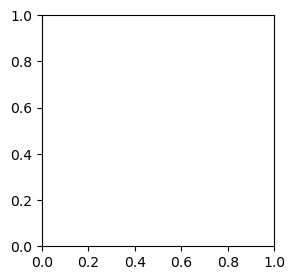

In [21]:
plt.figure(figsize=(3,3))
plt.scatter(xTest,yTest)
plt.scatter(xTest,y_pred_reshaped,c='r')
plt.grid(True)
plt.show()